In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tqdm         # for progress_apply

In [2]:
train = pd.read_csv('BRFSS_Prevalence_Data_2011_to_present.csv')

# Check the status using tqdm
for i in tqdm.tqdm(range(10000)):
    pass

# Read full features
pd.set_option('display.max_columns', None)

# Check the first 5 rows of the dataset
train.head()

100%|██████████| 10000/10000 [00:00<00:00, 1206820.31it/s]


,Year,Locationabbr,Locationdesc,Class,Topic,Question,Response,Break_Out,Break_Out_Category,Sample_Size,Data_value,Confidence_limit_Low,Confidence_limit_High,Display_order,Data_value_unit,Data_value_type,Data_Value_Footnote_Symbol,Data_Value_Footnote,DataSource,ClassId,TopicId,LocationID,BreakoutID,BreakOutCategoryID,QuestionID,ResponseID,GeoLocation
0,2011,AL,Alabama,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,Yes,18-24,Age Group,172,50.0,43.6,56.4,7.0,%,Crude Prevalence,NaN,NaN,BRFSS,CLASS01,Topic03,1,AGE01,CAT3,DRNKANY5,RESP046,"(32.840571122, -86.631860762)"
1,2011,AL,Alabama,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,No,18-24,Age Group,176,50.0,43.6,56.4,8.0,%,Crude Prevalence,NaN,NaN,BRFSS,CLASS01,Topic03,1,AGE01,CAT3,DRNKANY5,RESP054,"(32.840571122, -86.631860762)"
2,2011,AL,Alabama,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,Yes,25-34,Age Group,302,52.2,47.4,57.0,9.0,%,Crude Prevalence,NaN,NaN,BRFSS,CLASS01,Topic03,1,AGE02,CAT3,DRNKANY5,RESP046,"(32.840571122, -86.631860762)"
3,2011,AL,Alabama,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,No,25-34,Age Group,299,47.8,43.0,52.7,10.0,%,Crude Prevalence,NaN,NaN,BRFSS,CLASS01,Topic03,1,AGE02,CAT3,DRNKANY5,RESP054,"(32.840571122, -86.631860762)"
4,2011,AL,Alabama,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,Yes,35-44,Age Group,385,48.5,44.3,52.8,11.0,%,Crude Prevalence,NaN,NaN,BRFSS,CLASS01,Topic03,1,AGE03,CAT3,DRNKANY5,RESP046,"(32.840571122, -86.631860762)"


## Data Wrangling

In [3]:
print("Our dataset has {} rows and {} columns.".format(train.shape[0], train.shape[1]))

Our dataset has 2763102 rows and 27 columns.


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2763102 entries, 0 to 2763101
Data columns (total 27 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Year                        int64  
 1   Locationabbr                object 
 2   Locationdesc                object 
 3   Class                       object 
 4   Topic                       object 
 5   Question                    object 
 6   Response                    object 
 7   Break_Out                   object 
 8   Break_Out_Category          object 
 9   Sample_Size                 int64  
 10  Data_value                  float64
 11  Confidence_limit_Low        float64
 12  Confidence_limit_High       float64
 13  Display_order               float64
 14  Data_value_unit             object 
 15  Data_value_type             object 
 16  Data_Value_Footnote_Symbol  object 
 17  Data_Value_Footnote         object 
 18  DataSource                  object 
 19  ClassId              

In [5]:
train.describe()

,Year,Sample_Size,Data_value,Confidence_limit_Low,Confidence_limit_High,Display_order,LocationID
count,2.763102e+06,2.763102e+06,2.230768e+06,2.226536e+06,2.226536e+06,2.762508e+06,2.763102e+06
mean,2.017430e+03,6.391668e+02,4.044557e+01,3.710332e+01,4.379661e+01,7.912646e+02,3.089425e+01
std,3.606456e+00,1.357030e+03,3.323589e+01,3.300205e+01,3.370820e+01,1.251560e+03,1.774223e+01
min,2.011000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,2.014000e+03,3.300000e+01,1.070000e+01,8.000000e+00,1.320000e+01,1.000000e+00,1.700000e+01
50%,2.017000e+03,1.630000e+02,2.860000e+01,2.380000e+01,3.330000e+01,5.000000e+00,3.000000e+01
75%,2.021000e+03,6.150000e+02,7.360000e+01,6.890000e+01,7.830000e+01,1.390000e+03,4.500000e+01
max,2.023000e+03,3.749200e+04,1.000000e+02,1.000000e+02,1.000000e+02,4.493000e+03,9.900000e+01


In [6]:
# Check for missing values
train.isnull().sum()

Year                                0
Locationabbr                        0
Locationdesc                        0
Class                               0
Topic                               0
Question                            0
Response                        17621
Break_Out                           0
Break_Out_Category                  0
Sample_Size                         0
Data_value                     532334
Confidence_limit_Low           536566
Confidence_limit_High          536566
Display_order                     594
Data_value_unit                     0
Data_value_type                     0
Data_Value_Footnote_Symbol    2229766
Data_Value_Footnote           2229766
DataSource                          0
ClassId                             0
TopicId                             0
LocationID                          0
BreakoutID                          0
BreakOutCategoryID                  0
QuestionID                          0
ResponseID                          0
GeoLocation 

In [7]:
# We will deal with each feature one by one
# First, we will check the "Response" feature
train['Response'].value_counts() # to check 

Response
No                                              615572
Yes                                             597505
Not told they have arthritis                     17623
Married                                          17621
Good or Better Health                            17621
                                                 ...  
Self emplyd                                       2438
Homemkr                                           2434
Respondent is blind                               2205
Did not have CAT/ CT chest scan in last year      1352
Did have CAT/ CT chest scan in last year          1352
Name: count, Length: 151, dtype: int64

In [8]:
# Count unique values in the "Response" feature
unique_responses = train['Response'].nunique()
print("Number of unique responses:", unique_responses)

Number of unique responses: 151


In [9]:
# We notice that the "Response" feature has 151 unique values which is too much.
# We will reduce the number of unique values by grouping the responses into 5 categories

# # Grouping similar responses without renaming the column
def categorize_response(response):
    if isinstance(response, str):  # Check if response is a string
        if 'health' in response.lower():
            return 'Health Related'
        elif 'married' in response.lower():
            return 'Marital Status'
        elif 'blind' in response.lower():
            return 'Disability'
        elif response.lower() in ['yes', 'no']:
            return response.lower()
        elif response.lower() in ['not asked or missing']:
            return 'Not asked or Missing'
        elif response.lower() in ['don’t know/not sure', 'refused']:
            return 'Other'
        else:
            return 'Unknown'
    else:
        return 'Unknown'  # Handle non-string responses

# Apply the categorization directly to the 'Response' column
train['Response'] = train['Response'].apply(categorize_response)

# Check the updated responses
updated_counts = train['Response'].value_counts()
print(updated_counts)

Response
Unknown           1416673
no                 615572
yes                597505
Health Related      95907
Marital Status      35240
Disability           2205
Name: count, dtype: int64


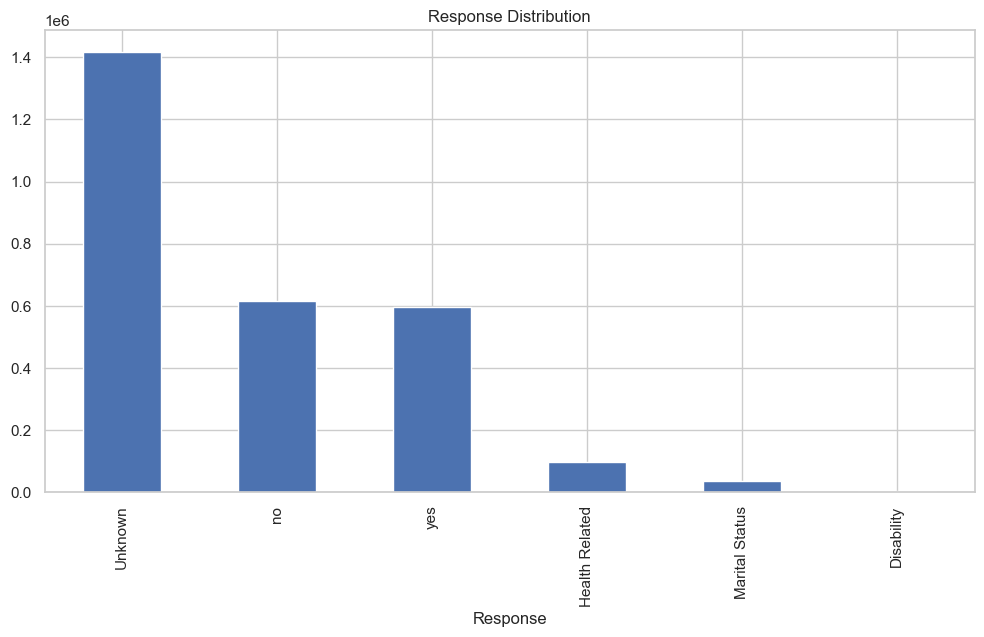

In [10]:
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
train['Response'].value_counts().plot(kind='bar')
plt.title('Response Distribution')
plt.show();

In [11]:
# Check the missing values in the "Response" feature
train['Response'].isnull().sum()

np.int64(0)

In [12]:
# Next, we will check the "Data_value" feature
train['Data_value'].value_counts()

Data_value
4.6     7114
3.8     6898
4.8     6879
4.4     6874
4.0     6872
        ... 
44.9     829
0.3      468
0.2      265
0.1       76
0.0       19
Name: count, Length: 1001, dtype: int64

In [13]:
# Since there are numerical float values in the "Data_value" feature, we will just impute the missing values with the mean
mean_data_value = train['Data_value'].mean()
train['Data_value'].fillna(mean_data_value, inplace=True)

# Check the missing values in the "Data_value" feature
train['Data_value'].isnull().sum()

np.int64(0)

In [14]:
# Next, "Confidence_limit_Low" and "Confidence_limit_High" features we will deal with them together
# We will impute the missing values with the mean
mean_confidence_limit_low = train['Confidence_limit_Low'].mean()
mean_confidence_limit_high = train['Confidence_limit_High'].mean()
train['Confidence_limit_Low'].fillna(mean_confidence_limit_low, inplace=True)
train['Confidence_limit_High'].fillna(mean_confidence_limit_high, inplace=True)

# Check the missing values in the "Confidence_limit_Low" and "Confidence_limit_High" features
print("Missing values in Confidence_limit_Low:", train['Confidence_limit_Low'].isnull().sum())
print("Missing values in Confidence_limit_High:", train['Confidence_limit_High'].isnull().sum())

Missing values in Confidence_limit_Low: 0
Missing values in Confidence_limit_High: 0


In [15]:
# We drop "Data_Value_Footnote" and "Data_Value_Footnote_Symbol" features
train.drop(['Data_Value_Footnote', 'Data_Value_Footnote_Symbol'], axis=1, inplace=True)

# Check the speed of the code using tqdm
for i in tqdm.tqdm(range(10000)):
    pass

train.head()

100%|██████████| 10000/10000 [00:00<00:00, 1110720.83it/s]


,Year,Locationabbr,Locationdesc,Class,Topic,Question,Response,Break_Out,Break_Out_Category,Sample_Size,Data_value,Confidence_limit_Low,Confidence_limit_High,Display_order,Data_value_unit,Data_value_type,DataSource,ClassId,TopicId,LocationID,BreakoutID,BreakOutCategoryID,QuestionID,ResponseID,GeoLocation
0,2011,AL,Alabama,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,yes,18-24,Age Group,172,50.0,43.6,56.4,7.0,%,Crude Prevalence,BRFSS,CLASS01,Topic03,1,AGE01,CAT3,DRNKANY5,RESP046,"(32.840571122, -86.631860762)"
1,2011,AL,Alabama,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,no,18-24,Age Group,176,50.0,43.6,56.4,8.0,%,Crude Prevalence,BRFSS,CLASS01,Topic03,1,AGE01,CAT3,DRNKANY5,RESP054,"(32.840571122, -86.631860762)"
2,2011,AL,Alabama,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,yes,25-34,Age Group,302,52.2,47.4,57.0,9.0,%,Crude Prevalence,BRFSS,CLASS01,Topic03,1,AGE02,CAT3,DRNKANY5,RESP046,"(32.840571122, -86.631860762)"
3,2011,AL,Alabama,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,no,25-34,Age Group,299,47.8,43.0,52.7,10.0,%,Crude Prevalence,BRFSS,CLASS01,Topic03,1,AGE02,CAT3,DRNKANY5,RESP054,"(32.840571122, -86.631860762)"
4,2011,AL,Alabama,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,yes,35-44,Age Group,385,48.5,44.3,52.8,11.0,%,Crude Prevalence,BRFSS,CLASS01,Topic03,1,AGE03,CAT3,DRNKANY5,RESP046,"(32.840571122, -86.631860762)"


In [16]:
train.isnull().sum()

Year                        0
Locationabbr                0
Locationdesc                0
Class                       0
Topic                       0
Question                    0
Response                    0
Break_Out                   0
Break_Out_Category          0
Sample_Size                 0
Data_value                  0
Confidence_limit_Low        0
Confidence_limit_High       0
Display_order             594
Data_value_unit             0
Data_value_type             0
DataSource                  0
ClassId                     0
TopicId                     0
LocationID                  0
BreakoutID                  0
BreakOutCategoryID          0
QuestionID                  0
ResponseID                  0
GeoLocation              4250
dtype: int64

In [17]:
# Clean "GeoLocation" feature
# Split the "GeoLocation" feature into "Latitude" and "Longitude" features
train['GeoLocation'] = train['GeoLocation'].str.strip('()')
train[['Latitude', 'Longitude']] = train['GeoLocation'].str.split(',', expand=True)
train['Latitude'] = train['Latitude'].astype(float)
train['Longitude'] = train['Longitude'].astype(float)
train.drop('GeoLocation', axis=1, inplace=True)

# Impute "Display order" feature with the mean
mean_display_order = train['Display_order'].mean()
train['Display_order'].fillna(mean_display_order, inplace=True)

# Check the missing values in the "Display_order" feature
train['Display_order'].isnull().sum()

# Check the speed of the code using tqdm
for i in tqdm.tqdm(range(10000)):
    pass

train.head()

100%|██████████| 10000/10000 [00:00<00:00, 1243161.92it/s]


,Year,Locationabbr,Locationdesc,Class,Topic,Question,Response,Break_Out,Break_Out_Category,Sample_Size,Data_value,Confidence_limit_Low,Confidence_limit_High,Display_order,Data_value_unit,Data_value_type,DataSource,ClassId,TopicId,LocationID,BreakoutID,BreakOutCategoryID,QuestionID,ResponseID,Latitude,Longitude
0,2011,AL,Alabama,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,yes,18-24,Age Group,172,50.0,43.6,56.4,7.0,%,Crude Prevalence,BRFSS,CLASS01,Topic03,1,AGE01,CAT3,DRNKANY5,RESP046,32.840571,-86.631861
1,2011,AL,Alabama,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,no,18-24,Age Group,176,50.0,43.6,56.4,8.0,%,Crude Prevalence,BRFSS,CLASS01,Topic03,1,AGE01,CAT3,DRNKANY5,RESP054,32.840571,-86.631861
2,2011,AL,Alabama,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,yes,25-34,Age Group,302,52.2,47.4,57.0,9.0,%,Crude Prevalence,BRFSS,CLASS01,Topic03,1,AGE02,CAT3,DRNKANY5,RESP046,32.840571,-86.631861
3,2011,AL,Alabama,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,no,25-34,Age Group,299,47.8,43.0,52.7,10.0,%,Crude Prevalence,BRFSS,CLASS01,Topic03,1,AGE02,CAT3,DRNKANY5,RESP054,32.840571,-86.631861
4,2011,AL,Alabama,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,yes,35-44,Age Group,385,48.5,44.3,52.8,11.0,%,Crude Prevalence,BRFSS,CLASS01,Topic03,1,AGE03,CAT3,DRNKANY5,RESP046,32.840571,-86.631861


In [18]:
train.isna().sum()

Year                        0
Locationabbr                0
Locationdesc                0
Class                       0
Topic                       0
Question                    0
Response                    0
Break_Out                   0
Break_Out_Category          0
Sample_Size                 0
Data_value                  0
Confidence_limit_Low        0
Confidence_limit_High       0
Display_order               0
Data_value_unit             0
Data_value_type             0
DataSource                  0
ClassId                     0
TopicId                     0
LocationID                  0
BreakoutID                  0
BreakOutCategoryID          0
QuestionID                  0
ResponseID                  0
Latitude                 4250
Longitude                4250
dtype: int64

In [19]:
# "Latitute" and "Longitude" features have missing values
# We will impute the missing values with the mean
mean_latitude = train['Latitude'].mean()
mean_longitude = train['Longitude'].mean()
train['Latitude'].fillna(mean_latitude, inplace=True)
train['Longitude'].fillna(mean_longitude, inplace=True)

# Check the missing values in the "Latitude" and "Longitude" features
print("Missing values in Latitude:", train['Latitude'].isnull().sum())
print("Missing values in Longitude:", train['Longitude'].isnull().sum())

Missing values in Latitude: 0
Missing values in Longitude: 0


In [20]:
train.head()

,Year,Locationabbr,Locationdesc,Class,Topic,Question,Response,Break_Out,Break_Out_Category,Sample_Size,Data_value,Confidence_limit_Low,Confidence_limit_High,Display_order,Data_value_unit,Data_value_type,DataSource,ClassId,TopicId,LocationID,BreakoutID,BreakOutCategoryID,QuestionID,ResponseID,Latitude,Longitude
0,2011,AL,Alabama,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,yes,18-24,Age Group,172,50.0,43.6,56.4,7.0,%,Crude Prevalence,BRFSS,CLASS01,Topic03,1,AGE01,CAT3,DRNKANY5,RESP046,32.840571,-86.631861
1,2011,AL,Alabama,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,no,18-24,Age Group,176,50.0,43.6,56.4,8.0,%,Crude Prevalence,BRFSS,CLASS01,Topic03,1,AGE01,CAT3,DRNKANY5,RESP054,32.840571,-86.631861
2,2011,AL,Alabama,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,yes,25-34,Age Group,302,52.2,47.4,57.0,9.0,%,Crude Prevalence,BRFSS,CLASS01,Topic03,1,AGE02,CAT3,DRNKANY5,RESP046,32.840571,-86.631861
3,2011,AL,Alabama,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,no,25-34,Age Group,299,47.8,43.0,52.7,10.0,%,Crude Prevalence,BRFSS,CLASS01,Topic03,1,AGE02,CAT3,DRNKANY5,RESP054,32.840571,-86.631861
4,2011,AL,Alabama,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,yes,35-44,Age Group,385,48.5,44.3,52.8,11.0,%,Crude Prevalence,BRFSS,CLASS01,Topic03,1,AGE03,CAT3,DRNKANY5,RESP046,32.840571,-86.631861


## Visualizing the Data

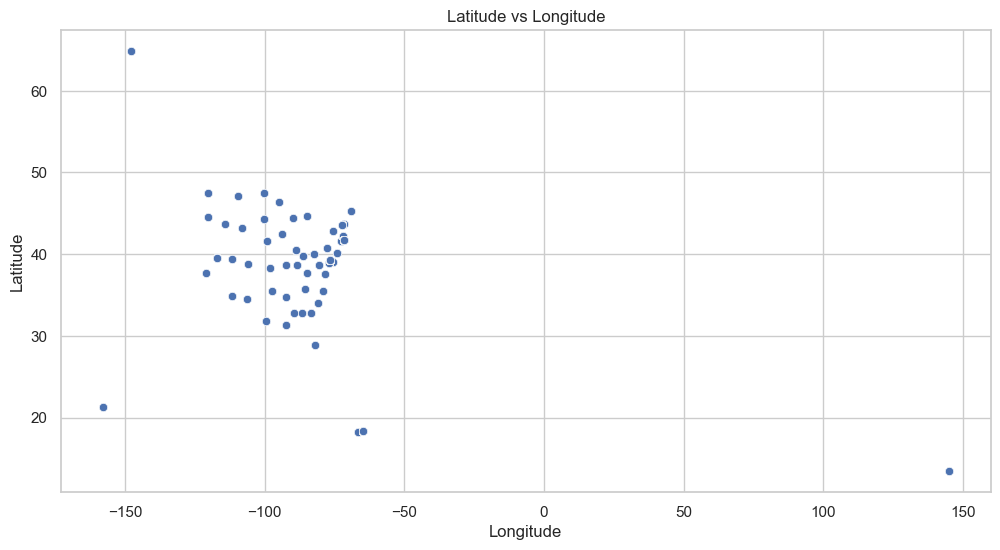

In [21]:
# We can first plot the "Latitude" and "Longitude" features to see the distribution of the data
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Longitude', y='Latitude', data=train)
plt.title('Latitude vs Longitude')
plt.show();

In [22]:
# Build a map using the "Latitude" and "Longitude" features
import folium

# Create a map centered at the mean of the "Latitude" and "Longitude" features
m = folium.Map(location=[train['Latitude'].mean(), train['Longitude'].mean()], zoom_start=5)

# Add markers to the map
for i in range(0, 1000):
    folium.Marker([train.iloc[i]['Latitude'], train.iloc[i]['Longitude']]).add_to(m)

# Display the map
m

In [23]:
train.head()

,Year,Locationabbr,Locationdesc,Class,Topic,Question,Response,Break_Out,Break_Out_Category,Sample_Size,Data_value,Confidence_limit_Low,Confidence_limit_High,Display_order,Data_value_unit,Data_value_type,DataSource,ClassId,TopicId,LocationID,BreakoutID,BreakOutCategoryID,QuestionID,ResponseID,Latitude,Longitude
0,2011,AL,Alabama,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,yes,18-24,Age Group,172,50.0,43.6,56.4,7.0,%,Crude Prevalence,BRFSS,CLASS01,Topic03,1,AGE01,CAT3,DRNKANY5,RESP046,32.840571,-86.631861
1,2011,AL,Alabama,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,no,18-24,Age Group,176,50.0,43.6,56.4,8.0,%,Crude Prevalence,BRFSS,CLASS01,Topic03,1,AGE01,CAT3,DRNKANY5,RESP054,32.840571,-86.631861
2,2011,AL,Alabama,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,yes,25-34,Age Group,302,52.2,47.4,57.0,9.0,%,Crude Prevalence,BRFSS,CLASS01,Topic03,1,AGE02,CAT3,DRNKANY5,RESP046,32.840571,-86.631861
3,2011,AL,Alabama,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,no,25-34,Age Group,299,47.8,43.0,52.7,10.0,%,Crude Prevalence,BRFSS,CLASS01,Topic03,1,AGE02,CAT3,DRNKANY5,RESP054,32.840571,-86.631861
4,2011,AL,Alabama,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,yes,35-44,Age Group,385,48.5,44.3,52.8,11.0,%,Crude Prevalence,BRFSS,CLASS01,Topic03,1,AGE03,CAT3,DRNKANY5,RESP046,32.840571,-86.631861


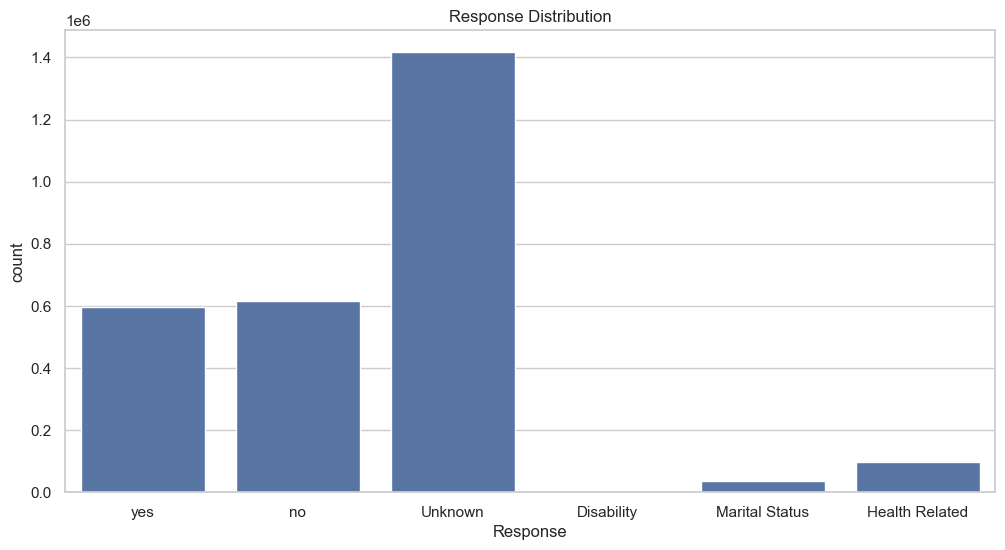

In [24]:
# Visualize the target variable
plt.figure(figsize=(12, 6))
sns.countplot(x='Response', data=train)
plt.title('Response Distribution')
plt.show();

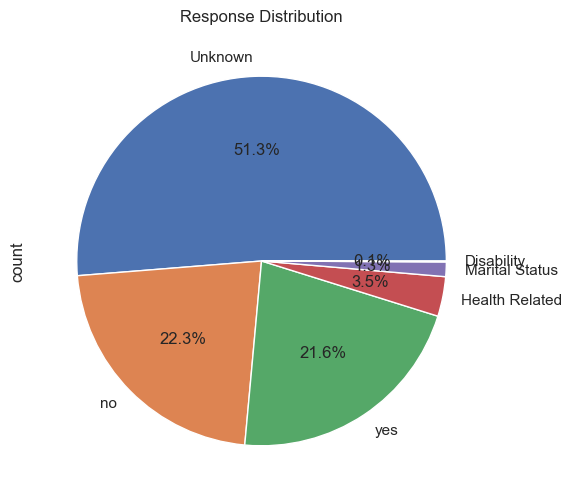

In [25]:
# A pie chart can also be used to visualize the target variable
plt.figure(figsize=(12, 6))
train['Response'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Response Distribution')
plt.show();

## Feature Engineering

In [26]:
# The "Break_Out" feature seems to contain a lot of values ranging from eudcation level, race, wage bracket, age etc
# We will group similar values together to reduce the number of unique values
train['Break_Out'].value_counts()

Break_Out
Overall                                                    116860
Female                                                     111335
Male                                                       110490
College graduate                                           109852
H.S. or G.E.D.                                             109850
Some post-H.S.                                             109848
Less than H.S.                                             109834
$15,000-$24,999                                            108840
Less than $15,000                                          108836
$25,000-$34,999                                            108823
$35,000-$49,999                                            108817
White, non-Hispanic                                        107711
Hispanic                                                   107573
Other, non-Hispanic                                        107571
Multiracial, non-Hispanic                                  107235


## Model Building

In [ ]:
# Next, we go model building
# We will use the "Response" feature as the target variable and the rest of the features as the input variables

# We will drop the "Year" feature since it has only one unique value
train.drop('Year', axis=1, inplace=True)

# We will use the "Response" feature as the target variable and the rest of the features as the input variables
X = train.drop('Response', axis=1)
y = train['Response']

X = pd.get_dummies(X, drop_first=True)  # This will convert categorical variables into dummy/indicator variables

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
lr = LogisticRegression()

# Fit the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_lr = lr.predict(X_test)

# Evaluate the model
print("Our Logistic Regression model has an accuracy of {:.2f}%.".format(accuracy_score(y_test, y_pred_lr) * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

In [29]:
# Check the speed of the code using tqdm
for i in tqdm.tqdm(range(10000)):
    pass

# We will use the RandomForestClassifier model to train the data
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Our RandomForestClassifier model has an accuracy of {:.2f}%.".format(accuracy_score(y_test, y_pred) * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


MemoryError: Unable to allocate 337. MiB for an array with shape (16, 2763102) and data type object

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the GBM model
gbm = GradientBoostingClassifier()

# Fit the model on the training data
gbm.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_gbm = gbm.predict(X_test)

# Evaluate the model
print("Our Gradient Boosting model has an accuracy of {:.2f}%.".format(accuracy_score(y_test, y_pred_gbm) * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gbm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gbm))

In [ ]:
from sklearn.svm import SVC

# Initialize the SVM model
svm = SVC()

# Fit the model on the training data
svm.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_svm = svm.predict(X_test)

# Evaluate the model
print("Our Support Vector Machine model has an accuracy of {:.2f}%.".format(accuracy_score(y_test, y_pred_svm) * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

In [ ]:
# Save the Random Forest model
joblib.dump(rf, 'random_forest_model.pkl')

# Save the Gradient Boosting model
joblib.dump(gbm, 'gradient_boosting_model.pkl')

# Save the Logistic Regression model
joblib.dump(lr, 'logistic_regression_model.pkl')

# Save the Support Vector Machine model
joblib.dump(svm, 'svm_model.pkl')